In [1]:
import pandas as pd
import numpy as np


In [6]:
df=pd.read_csv('BAJFINANCE.csv')

In [7]:
df.head()


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


In [8]:
df.set_index('Date',inplace=True)

<Axes: xlabel='Date'>

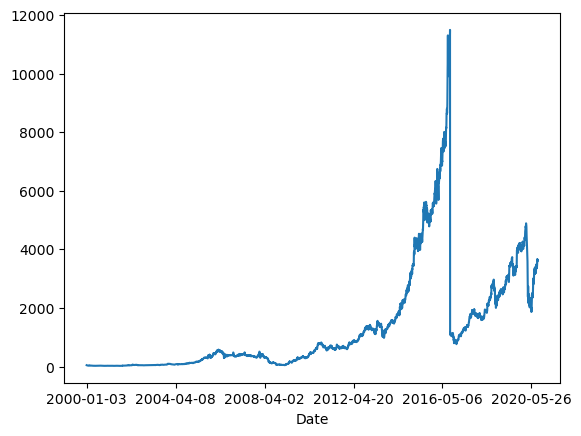

In [11]:
df['VWAP'].plot()

In [12]:
df.shape

(5070, 14)

In [13]:
df.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df.isna().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [17]:
df.shape

(2291, 14)

In [18]:
data=df.copy()

In [19]:
data.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [21]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [22]:
lag_features=['High','Low','Volume','Turnover','Trades']
window1=3
window2=7

In [30]:
for feature in lag_features:
    data[feature+'rolling_mean_3']=data[feature].rolling(window=window1).mean()
    data[feature+'rolling_mean_7']=data[feature].rolling(window=window2).mean()

In [37]:
for feature in lag_features:
    data[feature+'rolling_std_3']=data[feature].rolling(window=window1).std()
    data[feature+'rolling_std_7']=data[feature].rolling(window=window2).std()

In [32]:
data.head()


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Tradesrolling_std_3,Tradesrolling_std_7,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,6894,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-02,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,2769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,51427,...,670.500559,NaN,1.201388,NaN,2.309401,NaN,26980.871860,NaN,1.685217e+12,NaN
2011-06-06,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,5446,...,148.769396,NaN,1.625833,NaN,4.994080,NaN,27352.695339,NaN,1.710136e+12,NaN
2011-06-07,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,5991,...,78.270897,NaN,9.062422,NaN,8.008797,NaN,26391.221653,NaN,1.652377e+12,NaN


In [38]:
data.columns


Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Tradesrolling_std_3', 'Tradesrolling_std_7',
       'Highrolling_std_3', 'Highrolling_std_7', 'Lowrolling_std_3',
       'Lowrolling_std_7', 'Volumerolling_std_3', 'Volumerolling_std_7',
       'Turnoverrolling_std_3', 'Turnoverrolling_std_7'],
      dtype='object')

In [39]:
data.shape

(2291, 34)

In [41]:
data.isna().sum()

Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                    0
Deliverable Volume        0
%Deliverble               0
Highrolling_mean_3        2
Highrolling_mean_7        6
Lowrolling_mean_3         2
Lowrolling_mean_7         6
Volumerolling_mean_3      2
Volumerolling_mean_7      6
Turnoverrolling_mean_3    2
Turnoverrolling_mean_7    6
Tradesrolling_mean_3      2
Tradesrolling_mean_7      6
Tradesrolling_std_3       2
Tradesrolling_std_7       6
Highrolling_std_3         2
Highrolling_std_7         6
Lowrolling_std_3          2
Lowrolling_std_7          6
Volumerolling_std_3       2
Volumerolling_std_7       6
Turnoverrolling_std_3     2
Turnoverrolling_std_7     6
dtype: int64

In [42]:
data.dropna(inplace=True)

In [43]:
data.shape

(2285, 34)

In [44]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Tradesrolling_std_3', 'Tradesrolling_std_7',
       'Highrolling_std_3', 'Highrolling_std_7', 'Lowrolling_std_3',
       'Lowrolling_std_7', 'Volumerolling_std_3', 'Volumerolling_std_7',
       'Turnoverrolling_std_3', 'Turnoverrolling_std_7'],
      dtype='object')

In [45]:
ind_features=['Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Tradesrolling_std_3', 'Tradesrolling_std_7',
       'Highrolling_std_3', 'Highrolling_std_7', 'Lowrolling_std_3',
       'Lowrolling_std_7', 'Volumerolling_std_3', 'Volumerolling_std_7',
       'Turnoverrolling_std_3', 'Turnoverrolling_std_7']

In [46]:
training_data=data[0:1800]
testing_data=data[1800:]

In [47]:
training_data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Tradesrolling_std_3,Tradesrolling_std_7,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-09,BAJFINANCE,EQ,635.60,639.80,647.00,630.00,630.00,631.10,638.27,31252,...,354.841279,463.942320,12.769789,7.494911,15.011107,9.410145,13497.047986,18373.894011,8.665128e+11,1.155773e+12
2011-06-10,BAJFINANCE,EQ,631.10,641.85,648.25,618.55,621.10,622.20,634.16,30885,...,272.875429,448.020620,1.639360,8.227994,13.030765,9.501961,2434.970705,18047.331029,1.579562e+11,1.136003e+12
2011-06-13,BAJFINANCE,EQ,622.20,616.00,627.85,616.00,622.75,624.95,622.92,3981,...,557.373603,464.778596,11.434196,9.497080,7.456597,9.298317,15640.051929,17835.642665,9.982094e+11,1.123423e+12
2011-06-14,BAJFINANCE,EQ,624.95,625.00,628.95,619.95,621.20,622.10,625.35,5597,...,656.385050,455.234163,11.473593,10.198891,2.002707,9.293713,15088.183102,13139.472184,9.595224e+11,8.397765e+11
2011-06-15,BAJFINANCE,EQ,622.10,612.00,623.00,598.10,605.00,601.70,606.90,12590,...,150.639747,436.941971,3.165833,11.352292,11.643560,11.262712,4575.812970,12469.137006,2.733211e+11,7.983186e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-04,BAJFINANCE,EQ,2724.05,2724.00,2777.65,2683.50,2748.00,2746.30,2726.23,2606992,...,2794.744413,21708.856675,88.954937,79.489416,83.341306,107.041856,696998.737787,642979.884199,1.827289e+14,1.673270e+14
2018-09-05,BAJFINANCE,EQ,2746.30,2740.15,2764.80,2668.00,2704.45,2716.90,2712.53,1728455,...,21770.352164,17267.163548,63.129081,100.594924,24.113551,119.854378,483305.554092,570427.041296,1.375623e+14,1.467744e+14
2018-09-06,BAJFINANCE,EQ,2716.90,2729.00,2731.50,2671.40,2672.20,2684.10,2695.89,1147879,...,30923.312263,24013.596897,23.818183,113.135709,8.146779,118.187686,734609.476628,584307.816124,2.020435e+14,1.561692e+14


In [57]:
testing_data.shape

(485, 34)

In [48]:
!pip install pmdarima

  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ac/f8/6c9364602b13f0dba129b53acd1344859690911a4d5021560d9fd6aa087f/pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/18/ec/f47a721071d084d6c2b6783eb8d058b964b1450cb708d920d0d792f42001/Cython-3.0.10-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
   ------ ------------------------------- 112.6/614.7 kB 939.4 kB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 4.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   -------------- ------------------------- 1.0/2.8 MB 64.6 MB/s eta 0:00:01
   -------------- -------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [49]:
from pmdarima import auto_arima

In [50]:
import warnings
warnings.filterwarnings('ignore')

In [90]:
model=auto_arima(y=training_data['VWAP'],exogenous=training_data[ind_features])

In [91]:
model.fit(training_data['VWAP'],training_data[ind_features])

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [92]:
forecast=model.predict(n_periods=len(testing_data), X=testing_data[ind_features])

In [93]:
forecast

1800    2623.185689
1801    2638.848469
1802    2624.646464
1803    2597.888691
1804    2614.916792
           ...     
2280    2810.398621
2281    2890.518842
2282    2864.404612
2283    2810.580704
2284    2462.799508
Length: 485, dtype: float64

In [69]:
testing_data.shape

(485, 34)

In [70]:
len(testing_data)

485

In [71]:
testing_data[ind_features]

,Highrolling_mean_3,Highrolling_mean_7,Lowrolling_mean_3,Lowrolling_mean_7,Volumerolling_mean_3,Volumerolling_mean_7,Turnoverrolling_mean_3,Turnoverrolling_mean_7,Tradesrolling_mean_3,Tradesrolling_mean_7,Tradesrolling_std_3,Tradesrolling_std_7,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,
2018-09-11,2719.400000,2758.878571,2610.283333,2652.721429,2.064092e+06,2.027492e+06,5.465978e+14,5.474503e+14,89504.000000,86114.285714,40756.099335,32012.681782,44.330125,63.787942,56.544592,53.608580,1.130645e+06,8.164109e+05,2.905375e+14,2.170264e+14
2018-09-12,2681.250000,2724.157143,2558.116667,2624.264286,2.536726e+06,2.051134e+06,6.625717e+14,5.457439e+14,112805.333333,88611.142857,31297.267202,34656.587966,51.662632,51.914260,40.110047,66.236890,9.025933e+05,8.351259e+05,2.325644e+14,2.156391e+14
2018-09-14,2663.083333,2710.707143,2568.200000,2616.085714,2.611710e+06,1.935154e+06,6.822451e+14,5.122064e+14,112704.000000,84138.714286,31471.093038,33742.606344,23.795710,47.776811,55.315527,61.033875,7.836553e+05,8.007301e+05,2.018671e+14,2.036245e+14
2018-09-17,2660.150000,2695.735714,2576.866667,2604.692857,1.977597e+06,1.896135e+06,5.159104e+14,4.995687e+14,87183.333333,82386.142857,35128.684296,34854.254176,23.275363,44.294307,55.950343,57.040858,6.335337e+05,8.189293e+05,1.593010e+14,2.094265e+14
2018-09-18,2656.983333,2680.871429,2591.166667,2588.635714,1.566580e+06,1.939194e+06,4.109393e+14,5.091420e+14,64967.666667,84253.142857,10189.437390,32916.577887,28.146507,47.625517,33.719740,50.588419,1.979536e+05,7.800295e+05,5.634743e+13,2.006348e+14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-25,3538.333333,3475.992857,3430.350000,3389.157143,6.229009e+06,5.134360e+06,2.192348e+15,1.776493e+15,212607.666667,173809.285714,125273.490429,81831.863468,111.840660,89.327396,69.777271,61.471880,3.613401e+06,2.348888e+06,1.315344e+15,8.608028e+14
2020-08-26,3627.333333,3519.921429,3514.016667,3434.671429,7.574994e+06,5.419319e+06,2.708305e+15,1.901918e+15,254151.666667,181048.285714,74234.798338,82982.637290,100.081633,116.819954,115.027609,100.638138,1.987080e+06,2.403611e+06,7.237865e+14,8.886997e+14
2020-08-27,3678.466667,3552.842857,3579.133333,3467.500000,7.043513e+06,5.405723e+06,2.548738e+15,1.912267e+15,238727.666667,182218.571429,91269.616085,82597.470913,25.064982,122.216500,62.320569,111.614377,2.641848e+06,2.408580e+06,9.306171e+14,8.850381e+14


In [112]:
testing_data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Tradesrolling_std_7,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,forecast_ARIMA
Date,,,,,,,,,,,,,,,,,,,,,
2018-09-11,BAJFINANCE,EQ,2615.65,2621.00,2668.80,2562.25,2600.0,2600.75,2619.05,3357660,...,32012.681782,44.330125,63.787942,56.544592,53.608580,1.130645e+06,816410.887112,2.905375e+14,2.170264e+14,NaN
2018-09-12,BAJFINANCE,EQ,2600.75,2617.95,2636.95,2516.10,2588.9,2594.00,2577.54,2682340,...,34656.587966,51.662632,51.914260,40.110047,66.236890,9.025933e+05,835125.949241,2.325644e+14,2.156391e+14,NaN
2018-09-14,BAJFINANCE,EQ,2594.00,2630.50,2683.50,2626.25,2678.0,2672.20,2651.42,1795131,...,33742.606344,23.795710,47.776811,55.315527,61.033875,7.836553e+05,800730.132185,2.018671e+14,2.036245e+14,NaN
2018-09-17,BAJFINANCE,EQ,2672.20,2660.00,2660.00,2588.25,2596.0,2604.60,2613.75,1455320,...,34854.254176,23.275363,44.294307,55.950343,57.040858,6.335337e+05,818929.309318,1.593010e+14,2.094265e+14,NaN
2018-09-18,BAJFINANCE,EQ,2604.60,2610.00,2627.45,2559.00,2563.4,2570.40,2597.61,1449290,...,32916.577887,28.146507,47.625517,33.719740,50.588419,1.979536e+05,780029.521271,5.634743e+13,2.006348e+14,NaN


In [72]:
training_data[ind_features]

,Highrolling_mean_3,Highrolling_mean_7,Lowrolling_mean_3,Lowrolling_mean_7,Volumerolling_mean_3,Volumerolling_mean_7,Turnoverrolling_mean_3,Turnoverrolling_mean_7,Tradesrolling_mean_3,Tradesrolling_mean_7,Tradesrolling_std_3,Tradesrolling_std_7,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,
2011-06-09,638.650000,638.592857,612.666667,615.050000,2.136867e+04,1.866314e+04,1.356553e+12,1.175452e+12,682.666667,614.142857,354.841279,463.942320,12.769789,7.494911,15.011107,9.410145,13497.047986,18373.894011,8.665128e+11,1.155773e+12
2011-06-10,646.750000,640.271429,617.516667,615.414286,2.966667e+04,2.209043e+04,1.886054e+12,1.393498e+12,1045.000000,606.142857,272.875429,448.020620,1.639360,8.227994,13.030765,9.501961,2434.970705,18047.331029,1.579562e+11,1.136003e+12
2011-06-13,641.033333,638.692857,621.516667,614.842857,2.203933e+04,2.226357e+04,1.400430e+12,1.403765e+12,834.666667,580.142857,557.373603,464.778596,11.434196,9.497080,7.456597,9.298317,15640.051929,17835.642665,9.982094e+11,1.123423e+12
2011-06-14,635.016667,637.428571,618.166667,614.835714,1.348767e+04,1.571643e+04,8.521943e+11,9.945331e+11,602.666667,589.142857,656.385050,455.234163,11.473593,10.198891,2.002707,9.293713,15088.183102,13139.472184,9.595224e+11,8.397765e+11
2011-06-15,626.600000,634.857143,611.350000,612.942857,7.389333e+03,1.673700e+04,4.540265e+11,1.055761e+12,309.666667,619.571429,150.639747,436.941971,3.165833,11.352292,11.643560,11.262712,4575.812970,12469.137006,2.733211e+11,7.983186e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-04,2870.833333,2934.485714,2746.633333,2848.814286,2.160346e+06,1.649480e+06,6.015502e+14,4.715141e+14,106854.666667,87658.142857,2794.744413,21708.856675,88.954937,79.489416,83.341306,107.041856,696998.737787,642979.884199,1.827289e+14,1.673270e+14
2018-09-05,2807.483333,2906.742857,2688.933333,2812.092857,2.284096e+06,1.756973e+06,6.276342e+14,4.974827e+14,95882.333333,90342.000000,21770.352164,17267.163548,63.129081,100.594924,24.113551,119.854378,483305.554092,570427.041296,1.375623e+14,1.467744e+14
2018-09-06,2757.983333,2870.957143,2674.300000,2775.750000,1.827775e+06,1.744707e+06,4.963438e+14,4.897104e+14,75136.333333,84844.571429,30923.312263,24013.596897,23.818183,113.135709,8.146779,118.187686,734609.476628,584307.816124,2.020435e+14,1.561692e+14


In [74]:
testing_data.isna().sum()

Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                    0
Deliverable Volume        0
%Deliverble               0
Highrolling_mean_3        0
Highrolling_mean_7        0
Lowrolling_mean_3         0
Lowrolling_mean_7         0
Volumerolling_mean_3      0
Volumerolling_mean_7      0
Turnoverrolling_mean_3    0
Turnoverrolling_mean_7    0
Tradesrolling_mean_3      0
Tradesrolling_mean_7      0
Tradesrolling_std_3       0
Tradesrolling_std_7       0
Highrolling_std_3         0
Highrolling_std_7         0
Lowrolling_std_3          0
Lowrolling_std_7          0
Volumerolling_std_3       0
Volumerolling_std_7       0
Turnoverrolling_std_3     0
Turnoverrolling_std_7     0
dtype: int64

<Axes: >

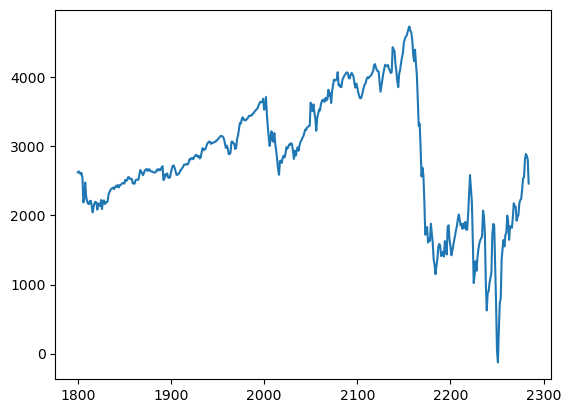

In [101]:
forecast.plot()

In [117]:
forecast

1800    2623.185689
1801    2638.848469
1802    2624.646464
1803    2597.888691
1804    2614.916792
           ...     
2280    2810.398621
2281    2890.518842
2282    2864.404612
2283    2810.580704
2284    2462.799508
Length: 485, dtype: float64

In [118]:
forecast.reset_index(drop=True, inplace=True)

In [119]:
forecast

0      2623.185689
1      2638.848469
2      2624.646464
3      2597.888691
4      2614.916792
          ...     
480    2810.398621
481    2890.518842
482    2864.404612
483    2810.580704
484    2462.799508
Length: 485, dtype: float64

In [122]:
forecast.index=testing_data.index

In [123]:
forecast

Date
2018-09-11    2623.185689
2018-09-12    2638.848469
2018-09-14    2624.646464
2018-09-17    2597.888691
2018-09-18    2614.916792
                 ...     
2020-08-25    2810.398621
2020-08-26    2890.518842
2020-08-27    2864.404612
2020-08-28    2810.580704
2020-08-31    2462.799508
Length: 485, dtype: float64

In [124]:
testing_data['forecast_ARIMA']=forecast

In [125]:
testing_data['forecast_ARIMA']

Date
2018-09-11    2623.185689
2018-09-12    2638.848469
2018-09-14    2624.646464
2018-09-17    2597.888691
2018-09-18    2614.916792
                 ...     
2020-08-25    2810.398621
2020-08-26    2890.518842
2020-08-27    2864.404612
2020-08-28    2810.580704
2020-08-31    2462.799508
Name: forecast_ARIMA, Length: 485, dtype: float64

In [105]:
testing_data['forecast_ARIMA'].dtype

dtype('float64')

In [106]:
len(testing_data['forecast_ARIMA'])

485

In [107]:
forecast.isna().sum()

0

<Axes: xlabel='Date'>

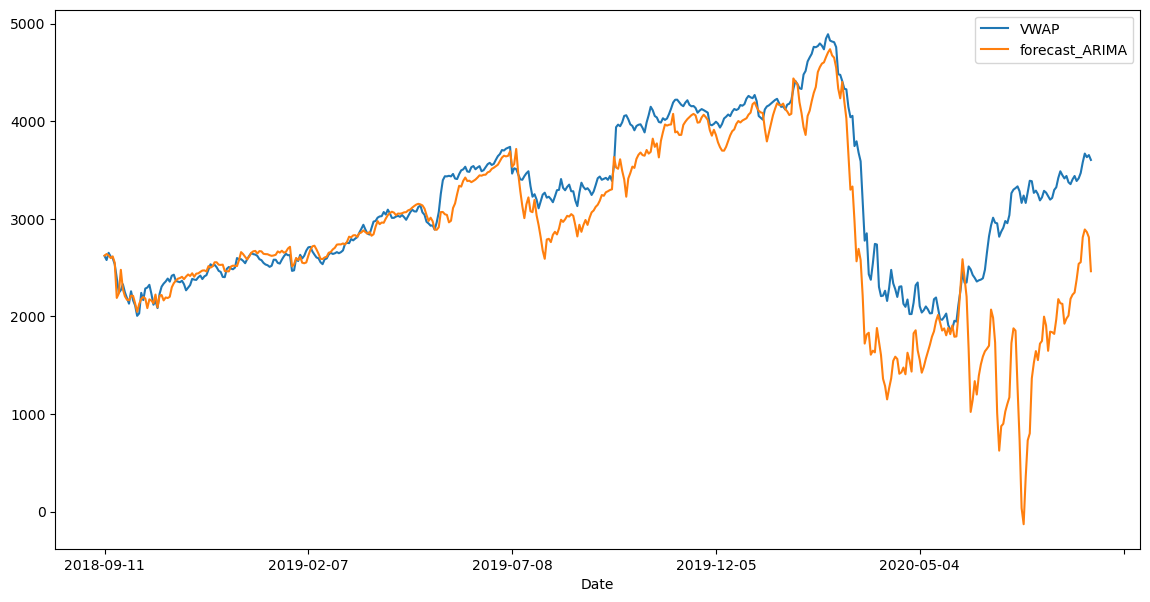

In [126]:
testing_data[['VWAP','forecast_ARIMA']].plot(figsize=(14,7))

In [127]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [128]:
np.sqrt(mean_squared_error(testing_data['VWAP'],testing_data['forecast_ARIMA']))

635.7949136608406

In [129]:
mean_absolute_error(testing_data['VWAP'],testing_data['forecast_ARIMA'])

365.845847467233